In [1]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(os.path.dirname(os.getcwd()))

In [3]:
df=pd.read_csv("data/processed.csv")

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,tamaño2,Gratuito,tipo_contenido,Genero1,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
0,#NAME?,COMICS,3.5,115.0,9.1M,10000,Free,0.00,Mature 17+,Comics,...,2.0,1.0,2.0,19,2106,70.0,5.0,5,2.0,10
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000,Free,0.00,Everyone,Social,...,3.0,1.0,1.0,26,2086,70.0,5.0,5,2.0,9
2,.R,TOOLS,4.5,259.0,203k,10000,Free,0.00,Everyone,Tools,...,6.0,1.0,1.0,15,3502,117.0,2.0,1,0.0,8
3,/u/app,COMMUNICATION,4.7,573.0,53M,10000,Free,0.00,Mature 17+,Communication,...,5.0,1.0,2.0,24,2116,71.0,4.0,4,2.0,9
4,058.ba,NEWS_AND_MAGAZINES,4.4,27.0,14M,100,Free,0.00,Everyone,News & Magazines,...,3.0,1.0,1.0,14,2113,70.0,5.0,1,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883,감성학원 BL 첫사랑,COMICS,4.4,190.0,34M,10000,Free,0.00,Everyone,Comics,...,4.0,1.0,1.0,19,2344,78.0,2.0,3,1.0,2
8884,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000,Paid,399.99,Everyone,Lifestyle,...,4.0,0.0,1.0,4,2230,74.0,1.0,1,0.0,11
8885,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18M,1000000,Free,0.00,Everyone,Social,...,3.0,1.0,1.0,26,2095,70.0,5.0,4,2.0,7
8886,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19.0,3.2M,10000,Free,0.00,Everyone,Tools,...,6.0,1.0,1.0,15,2371,79.0,2.0,1,0.0,8


In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
for i,j in enumerate(list(train.groupby("Genero1")["Descargas2"].mean().sort_values().values)):
    train.loc[train["Genero1"]==i,"Genero2"]=j

In [7]:
test["Genero2"]=pd.merge(train, test, on="Genero1", how="left")["Genero2"]

In [8]:
for i in list(pd.DataFrame(train.groupby("grupoversiones")["Descargas2"].mean()).index):
    train.loc[train["grupoversiones"]==i, "media_inst_grp_ver"] = round(pd.DataFrame(train.groupby("grupoversiones")["Descargas2"].mean()).iloc[int(i),:].values[0],0)
train["media_inst_grp_ver"]=train["media_inst_grp_ver"].astype(int)

In [9]:
test["media_inst_grp_ver"]=pd.merge(train, test, on="grupoversiones", how="left")["media_inst_grp_ver"]

In [10]:
for i in list(pd.DataFrame(train.groupby("grupoversiones")["Descargas2"].median()).index):
    train.loc[train["grupoversiones"]==i, "mediana_inst_grp_ver"] = round(pd.DataFrame(train.groupby("grupoversiones")["Descargas2"].median()).iloc[int(i),:].values[0],0)
train["mediana_inst_grp_ver"]=train["mediana_inst_grp_ver"].astype(int)

In [11]:
test["mediana_inst_grp_ver"]=pd.merge(train, test, on="grupoversiones", how="left")["mediana_inst_grp_ver"]

In [12]:
train['med_versandroid'] = train.groupby("version_android")["Descargas2"].transform('mean').round()

In [13]:
test["med_versandroid"]=pd.merge(train, test, on="version_android", how="left")["med_versandroid"]

<Axes: >

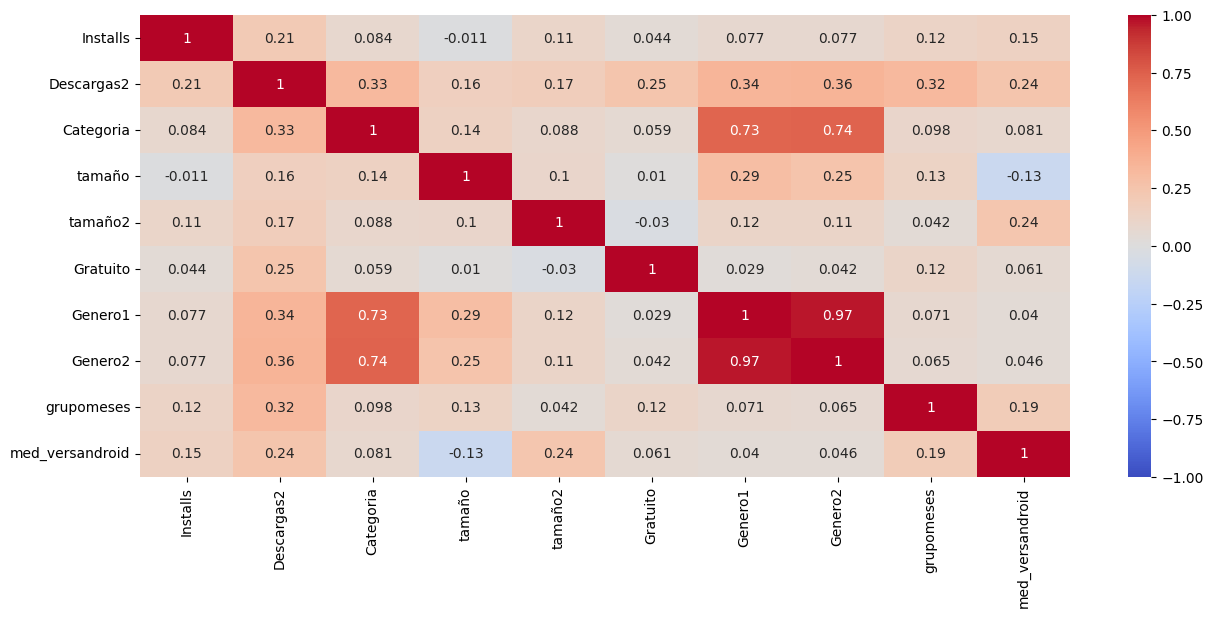

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(train[["Installs","Descargas2","Categoria","tamaño","tamaño2","Gratuito", "Genero1","Genero2", "grupomeses", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

<Axes: >

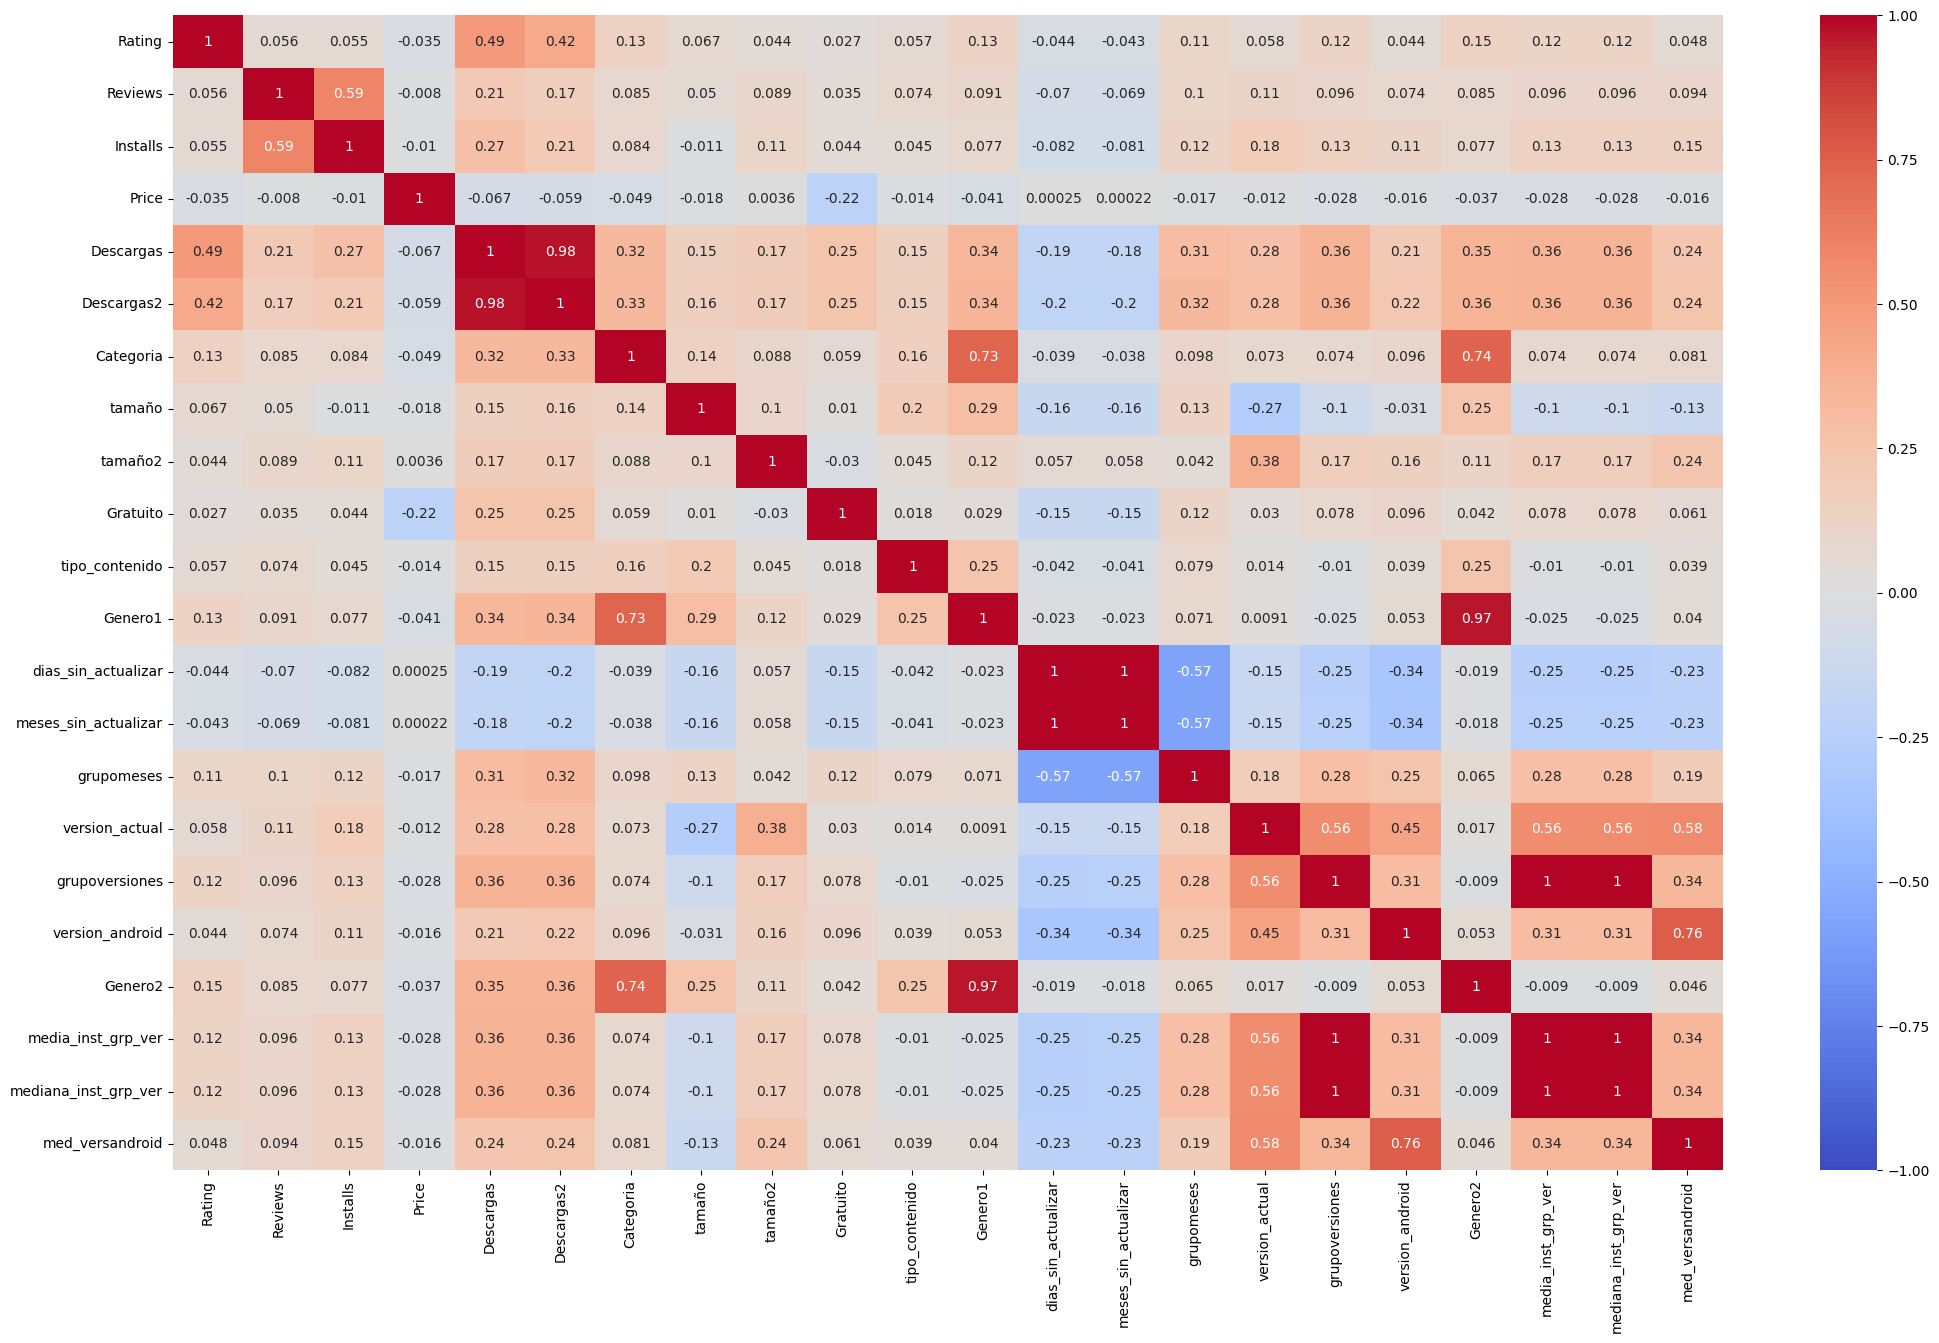

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(train.corr(numeric_only=True),vmin=-1, annot=True, cmap="coolwarm")

In [17]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)